In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "trentino-alto adige"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,30.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,25.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,2020-12-02T17:00:00,4,Trentino-Alto Adige,828,80,908,12880,13788,39,595,...,11.0,5716.0,1641.0,29.0,8.81,6.59,10.41,36.26,2.56,0.28
282,2020-12-03T17:00:00,4,Trentino-Alto Adige,832,80,912,12835,13747,-41,613,...,25.0,6293.0,1619.0,-45.0,8.77,6.63,9.74,37.86,0.00,-0.30
283,2020-12-04T17:00:00,4,Trentino-Alto Adige,833,79,912,12780,13692,-55,540,...,17.0,5940.0,1611.0,-55.0,8.66,6.66,9.09,33.52,-1.25,-0.40
284,2020-12-05T17:00:00,4,Trentino-Alto Adige,814,79,893,12738,13631,-61,492,...,12.0,5664.0,1454.0,-42.0,8.85,6.55,8.69,33.84,0.00,-0.45


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 6, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 464
Nuovi tamponi: 5367.0
Percentuale nuovi positivi/nuovi tamponi: 8.6 %
Nuovi guariti: 749.0
Nuovi deceduti: 8.0
Variazione positivi ricoverati con sintomi: 10.0
Variazione positivi in terapia intensiva: 1.0
Variazione positivi in isolamento dimiciliare: -304.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 6, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-07T17:00:00,4,Trentino-Alto Adige,39,1,40,1276,1316,23,87,...,0.0,3643.0,1194.0,26.0,2.50,3.04,2.39,7.29,0.00,1.78
1,2020-10-08T17:00:00,4,Trentino-Alto Adige,48,1,49,1367,1416,100,128,...,0.0,4405.0,1797.0,91.0,2.04,3.46,2.91,7.12,0.00,7.60
2,2020-10-09T17:00:00,4,Trentino-Alto Adige,55,2,57,1421,1478,62,124,...,0.0,3531.0,1224.0,54.0,3.51,3.86,3.51,10.13,100.00,4.38
3,2020-10-10T17:00:00,4,Trentino-Alto Adige,54,2,56,1504,1560,82,142,...,2.0,4211.0,1543.0,83.0,3.57,3.59,3.37,9.20,0.00,5.55
4,2020-10-11T17:00:00,4,Trentino-Alto Adige,54,1,55,1566,1621,61,123,...,1.0,3446.0,1292.0,62.0,1.82,3.39,3.57,9.52,-50.00,3.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-02T17:00:00,4,Trentino-Alto Adige,828,80,908,12880,13788,39,595,...,11.0,5716.0,1641.0,29.0,8.81,6.59,10.41,36.26,2.56,0.28
57,2020-12-03T17:00:00,4,Trentino-Alto Adige,832,80,912,12835,13747,-41,613,...,25.0,6293.0,1619.0,-45.0,8.77,6.63,9.74,37.86,0.00,-0.30
58,2020-12-04T17:00:00,4,Trentino-Alto Adige,833,79,912,12780,13692,-55,540,...,17.0,5940.0,1611.0,-55.0,8.66,6.66,9.09,33.52,-1.25,-0.40
59,2020-12-05T17:00:00,4,Trentino-Alto Adige,814,79,893,12738,13631,-61,492,...,12.0,5664.0,1454.0,-42.0,8.85,6.55,8.69,33.84,0.00,-0.45


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

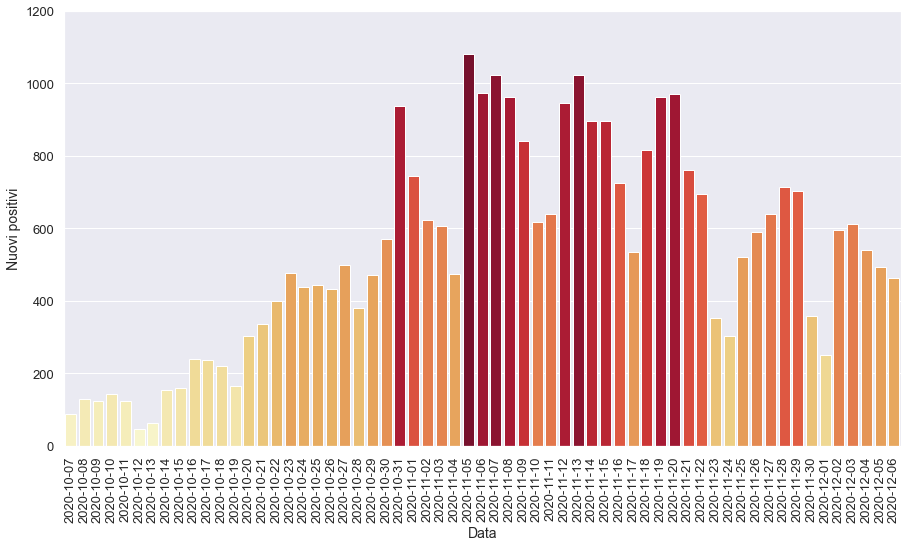

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

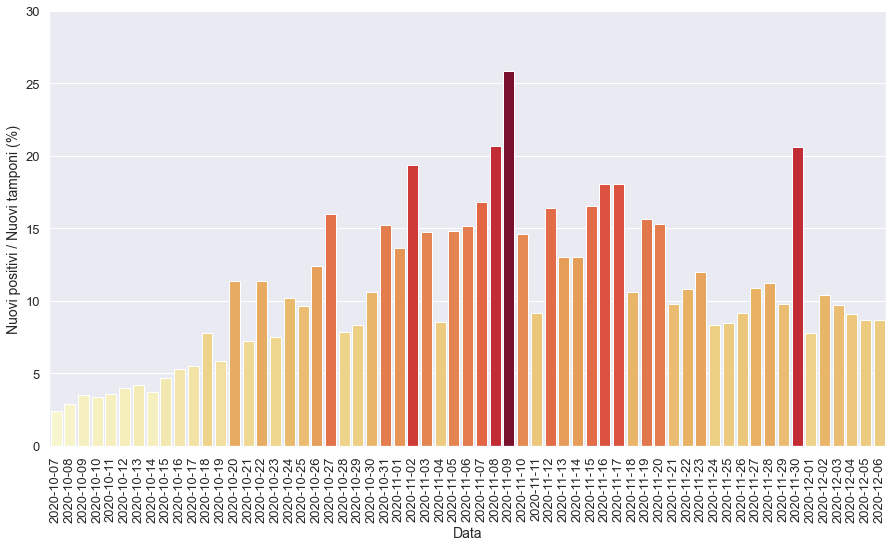

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

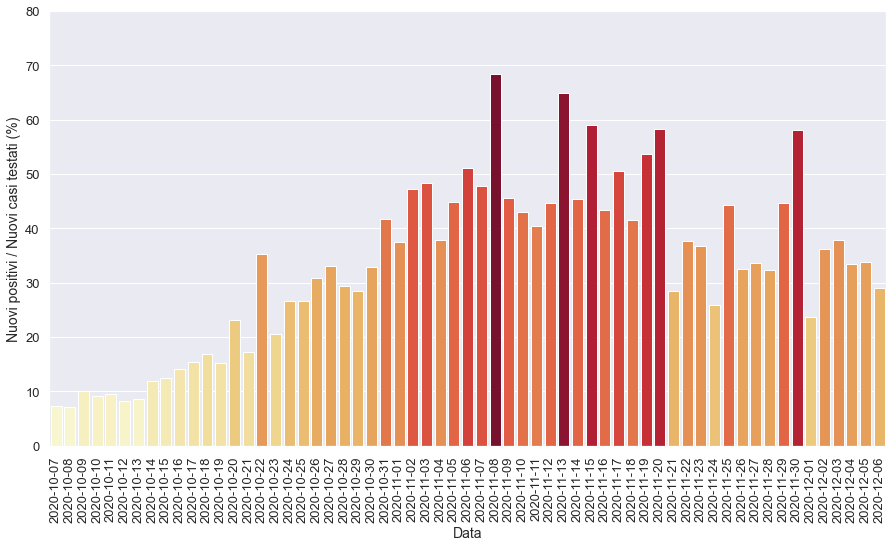

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

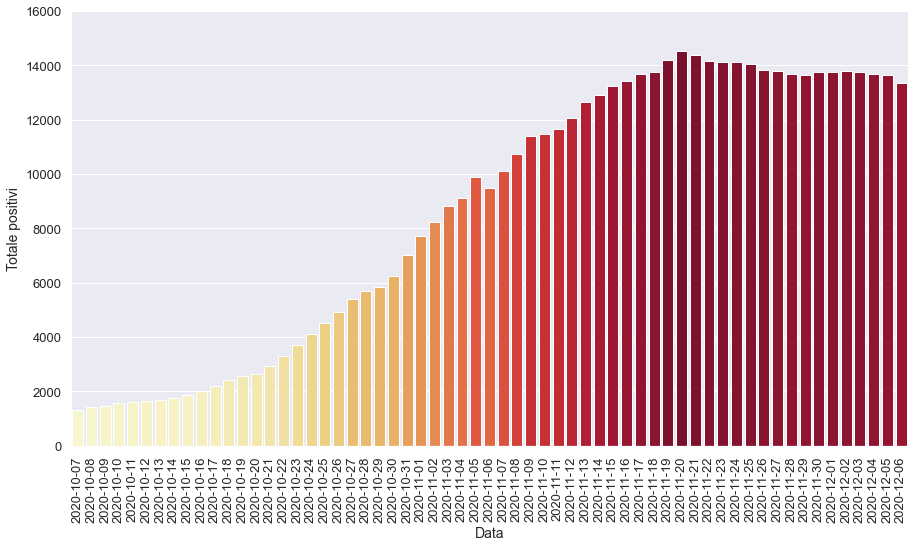

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

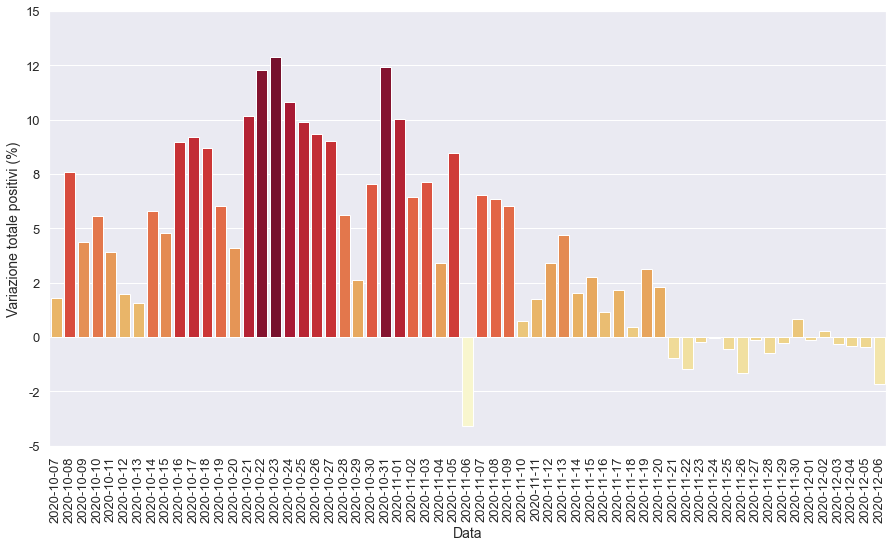

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

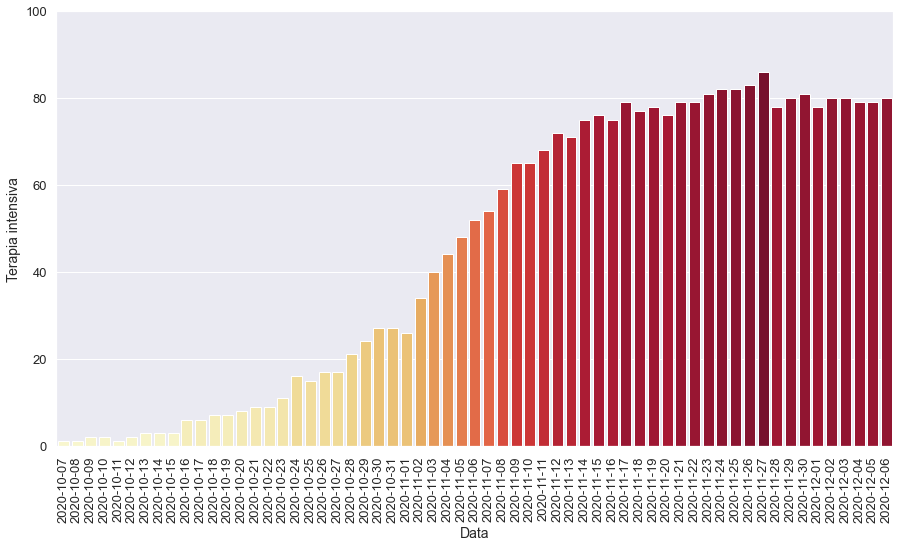

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

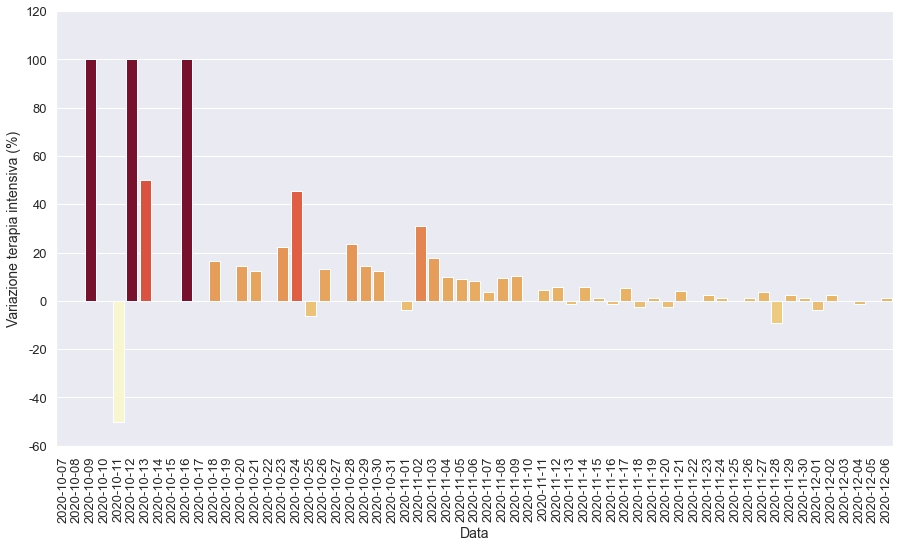

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

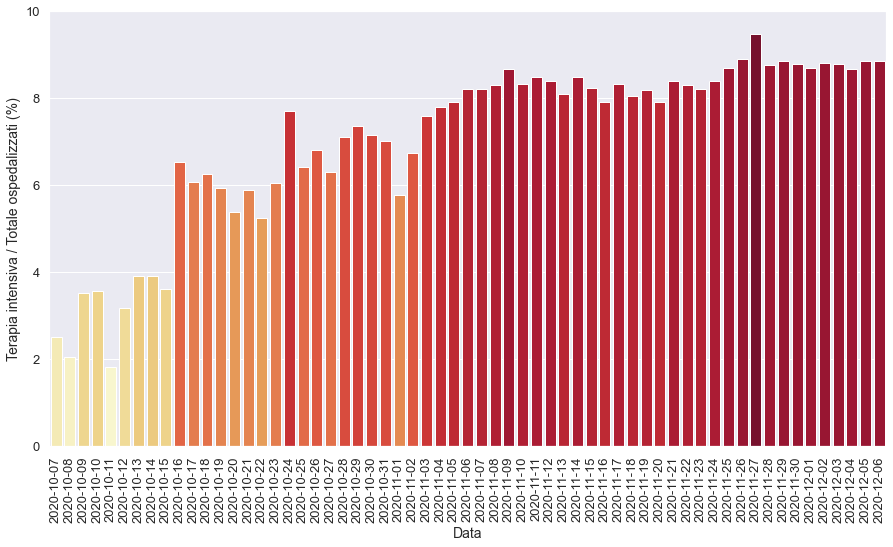

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

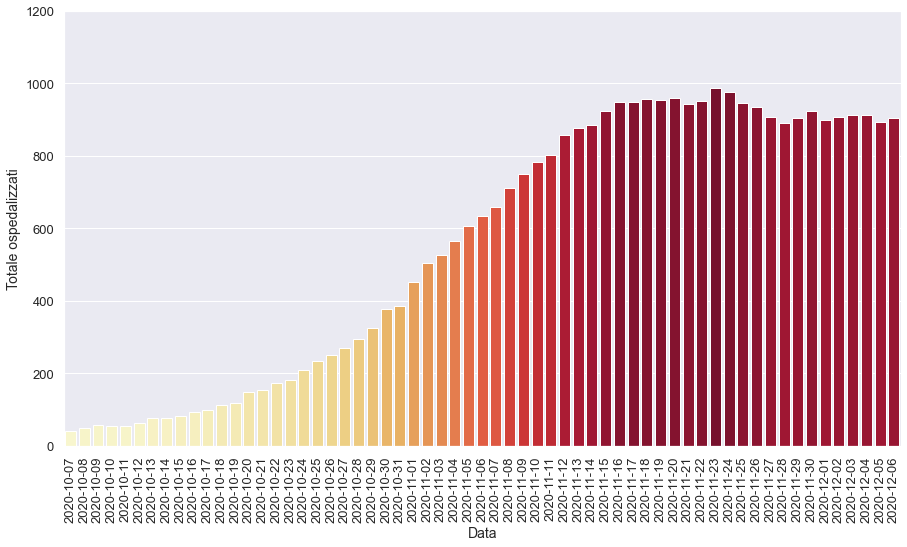

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

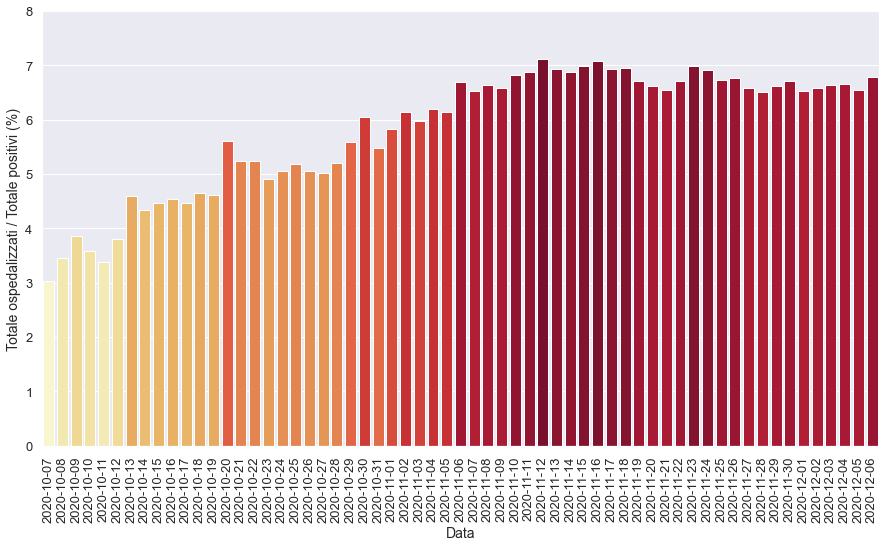

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

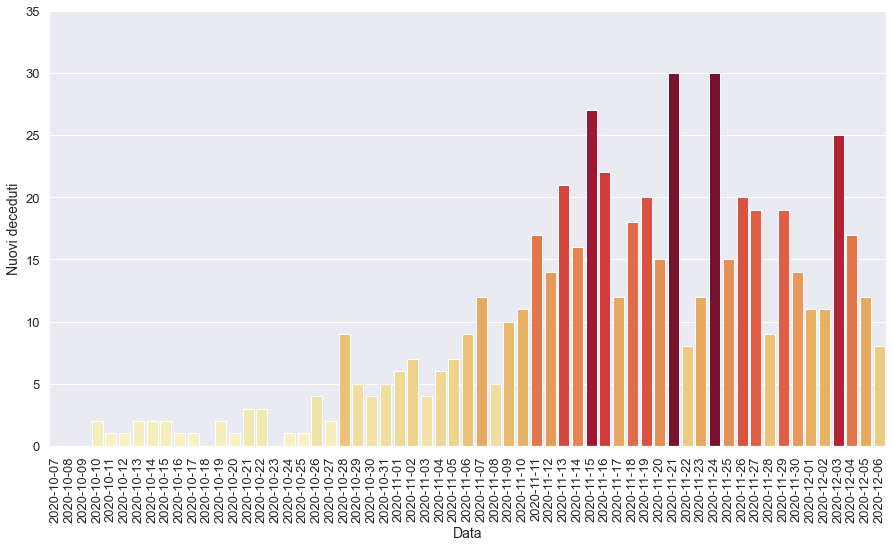

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

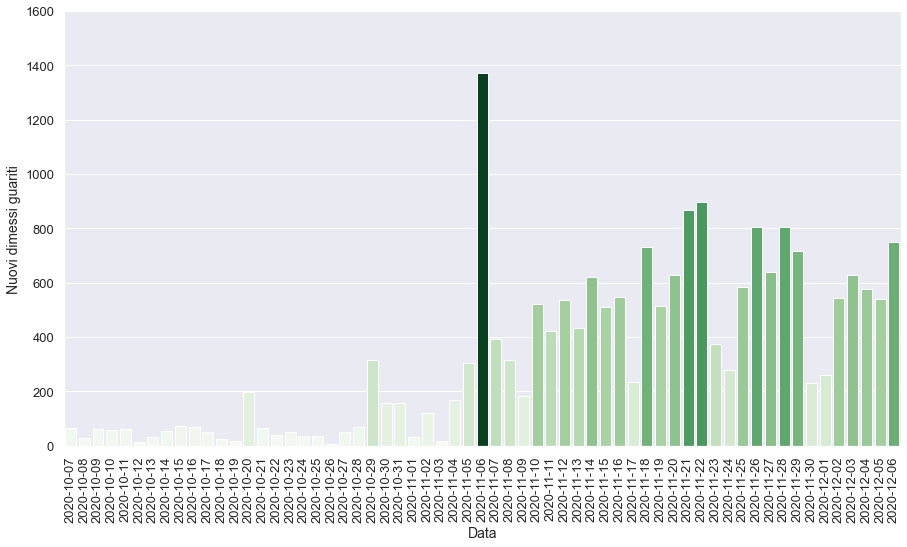

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-06T17:00:00,4,Trentino-Alto Adige,582,52,634,8845,9479,-405,974,...,9.0,6424.0,1909.0,-432.0,8.20,6.69,15.16,51.02,8.33,-4.10
1,2020-11-07T17:00:00,4,Trentino-Alto Adige,604,54,658,9440,10098,619,1024,...,12.0,6083.0,2139.0,595.0,8.21,6.52,16.83,47.87,3.85,6.53
2,2020-11-08T17:00:00,4,Trentino-Alto Adige,653,59,712,10028,10740,642,963,...,5.0,4657.0,1407.0,588.0,8.29,6.63,20.68,68.44,9.26,6.36
3,2020-11-09T17:00:00,4,Trentino-Alto Adige,686,65,751,10637,11388,648,840,...,10.0,3250.0,1843.0,609.0,8.66,6.59,25.85,45.58,10.17,6.03
4,2020-11-10T17:00:00,4,Trentino-Alto Adige,717,65,782,10690,11472,84,618,...,11.0,4235.0,1439.0,53.0,8.31,6.82,14.59,42.95,0.00,0.74
5,2020-11-11T17:00:00,4,Trentino-Alto Adige,734,68,802,10870,11672,200,639,...,17.0,6985.0,1578.0,180.0,8.48,6.87,9.15,40.49,4.62,1.74
6,2020-11-12T17:00:00,4,Trentino-Alto Adige,786,72,858,11210,12068,396,947,...,14.0,5779.0,2120.0,340.0,8.39,7.11,16.39,44.67,5.88,3.39
7,2020-11-13T17:00:00,4,Trentino-Alto Adige,806,71,877,11757,12634,566,1022,...,21.0,7833.0,1573.0,547.0,8.10,6.94,13.05,64.97,-1.39,4.69
8,2020-11-14T17:00:00,4,Trentino-Alto Adige,811,75,886,12007,12893,259,896,...,16.0,6877.0,1975.0,250.0,8.47,6.87,13.03,45.37,5.63,2.05
9,2020-11-15T17:00:00,4,Trentino-Alto Adige,849,76,925,12327,13252,359,896,...,27.0,5408.0,1516.0,320.0,8.22,6.98,16.57,59.10,1.33,2.78


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

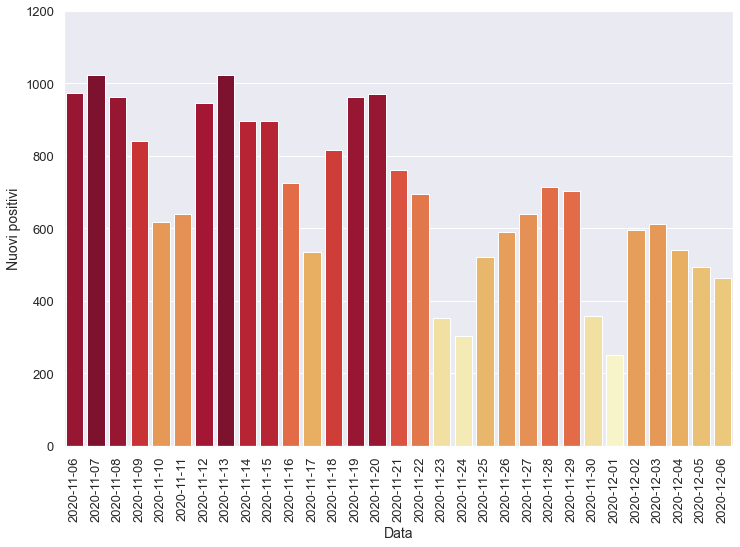

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

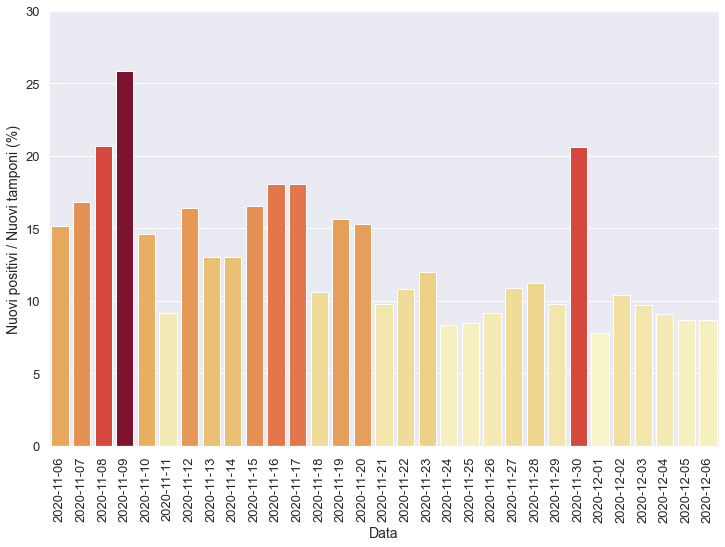

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

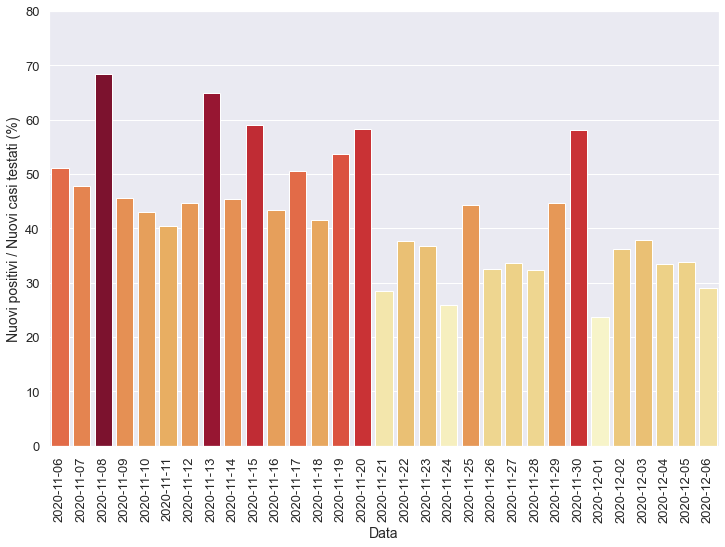

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

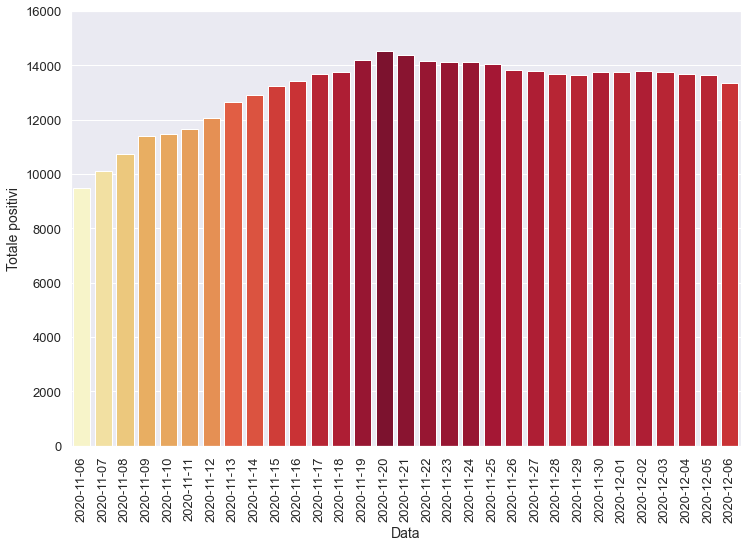

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

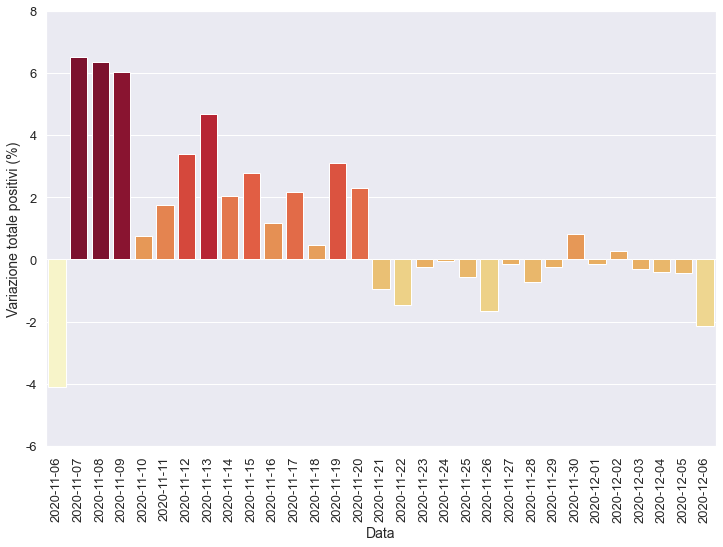

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

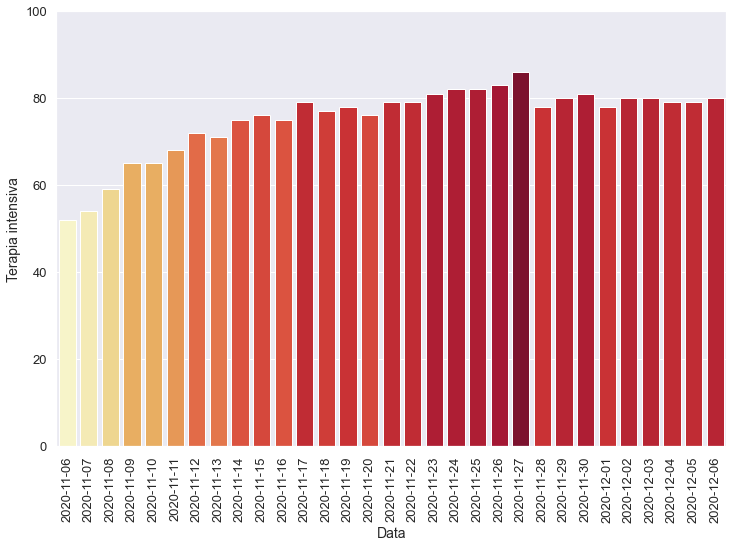

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

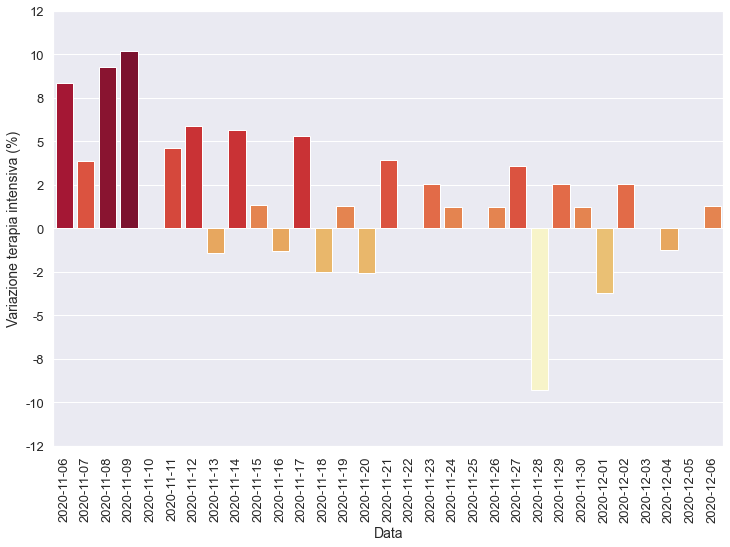

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

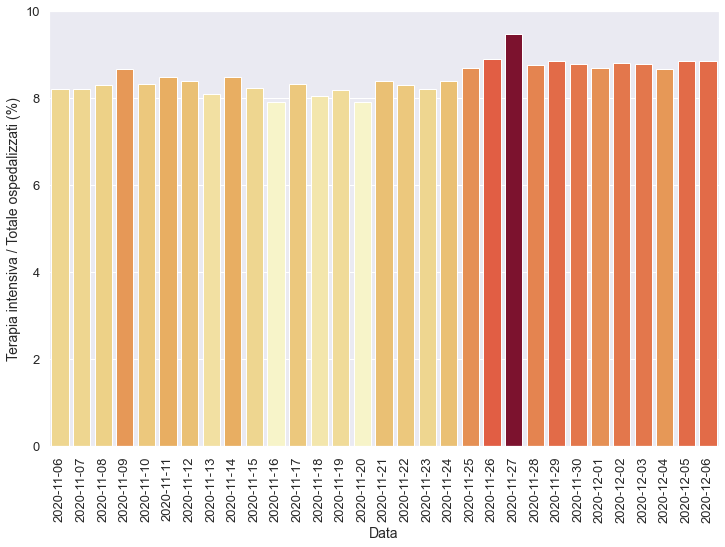

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

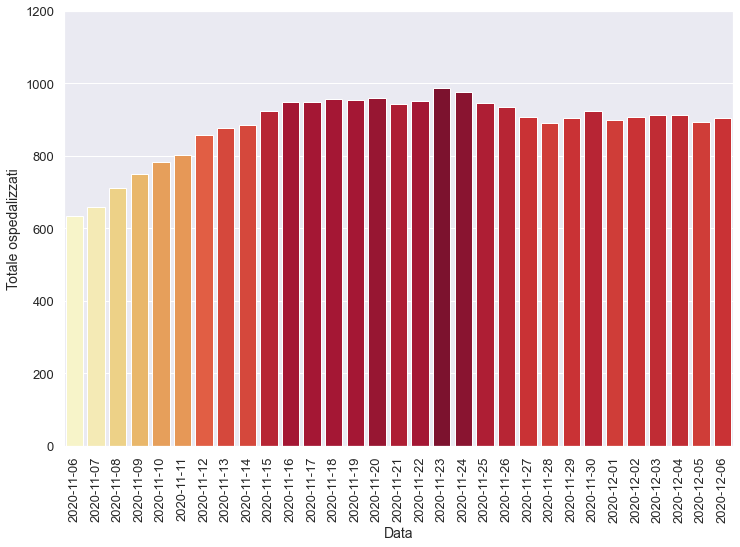

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

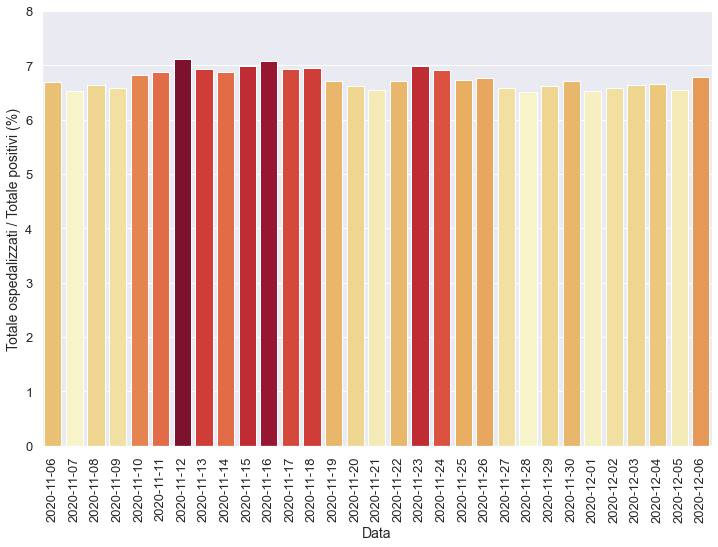

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

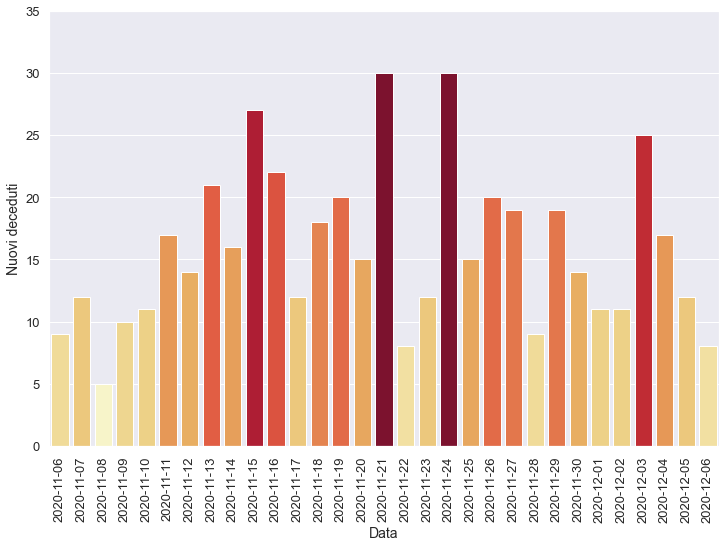

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

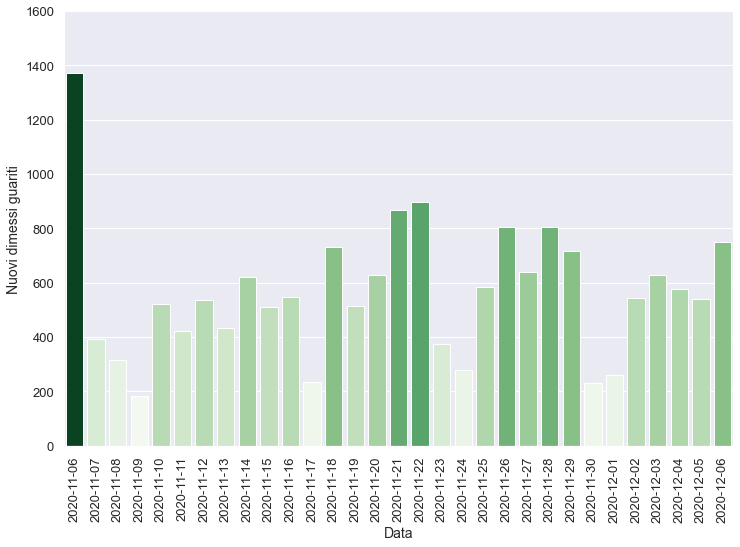

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-29T17:00:00,4,Trentino-Alto Adige,824,80,904,12752,13656,-35,702,...,19.0,7177.0,1569.0,-48.0,8.85,6.62,9.78,44.74,2.56,-0.26
1,2020-11-30T17:00:00,4,Trentino-Alto Adige,843,81,924,12846,13770,114,359,...,14.0,1739.0,617.0,94.0,8.77,6.71,20.64,58.18,1.25,0.83
2,2020-12-01T17:00:00,4,Trentino-Alto Adige,820,78,898,12851,13749,-21,250,...,11.0,3210.0,1054.0,5.0,8.69,6.53,7.79,23.72,-3.70,-0.15
3,2020-12-02T17:00:00,4,Trentino-Alto Adige,828,80,908,12880,13788,39,595,...,11.0,5716.0,1641.0,29.0,8.81,6.59,10.41,36.26,2.56,0.28
4,2020-12-03T17:00:00,4,Trentino-Alto Adige,832,80,912,12835,13747,-41,613,...,25.0,6293.0,1619.0,-45.0,8.77,6.63,9.74,37.86,0.00,-0.30
5,2020-12-04T17:00:00,4,Trentino-Alto Adige,833,79,912,12780,13692,-55,540,...,17.0,5940.0,1611.0,-55.0,8.66,6.66,9.09,33.52,-1.25,-0.40
6,2020-12-05T17:00:00,4,Trentino-Alto Adige,814,79,893,12738,13631,-61,492,...,12.0,5664.0,1454.0,-42.0,8.85,6.55,8.69,33.84,0.00,-0.45
7,2020-12-06T17:00:00,4,Trentino-Alto Adige,824,80,904,12434,13338,-293,464,...,8.0,5367.0,1601.0,-304.0,8.85,6.78,8.65,28.98,1.27,-2.15


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

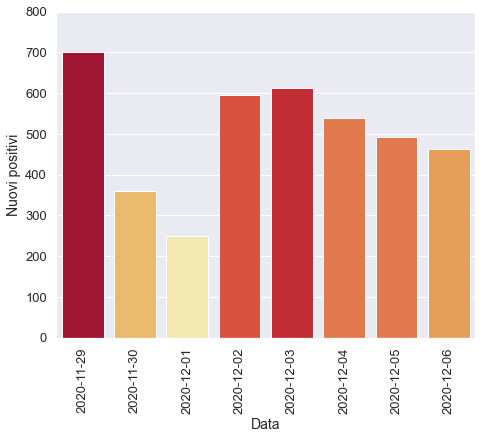

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

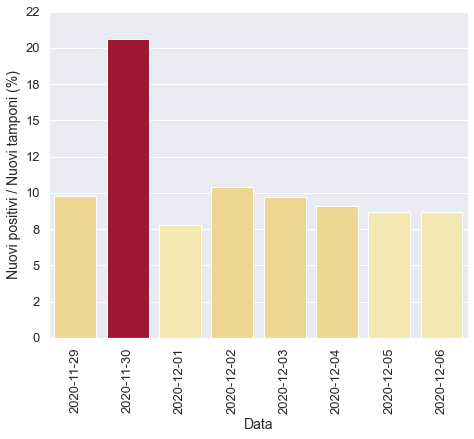

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

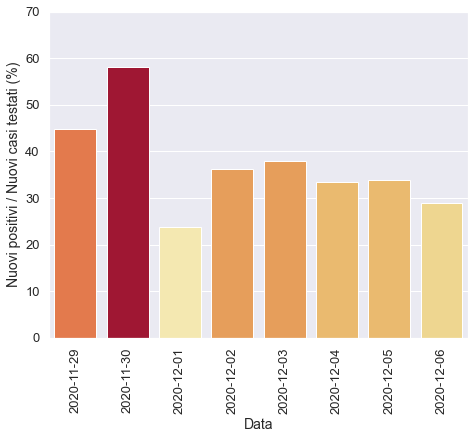

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

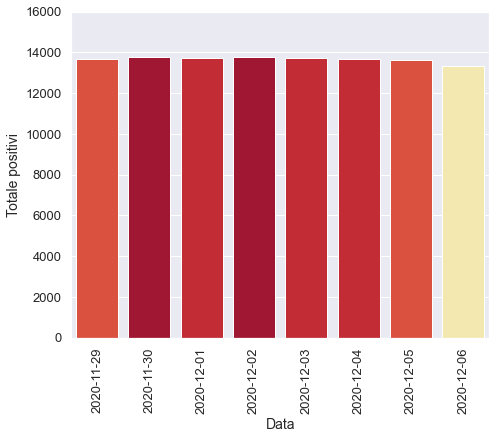

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

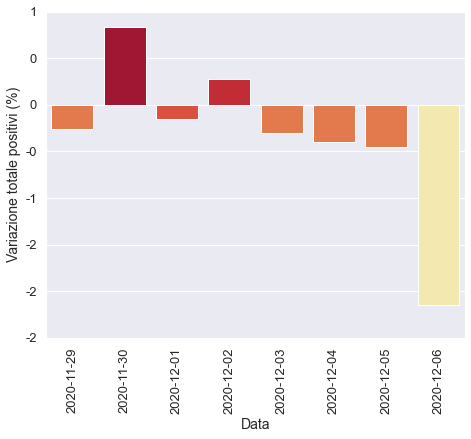

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

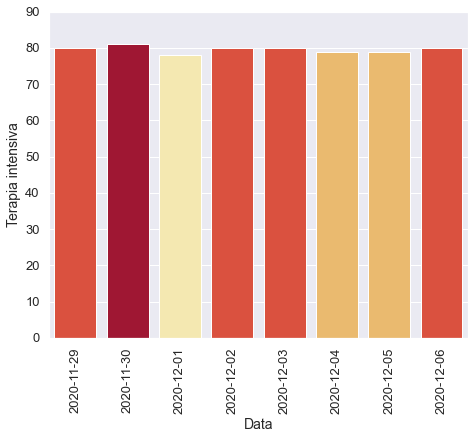

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

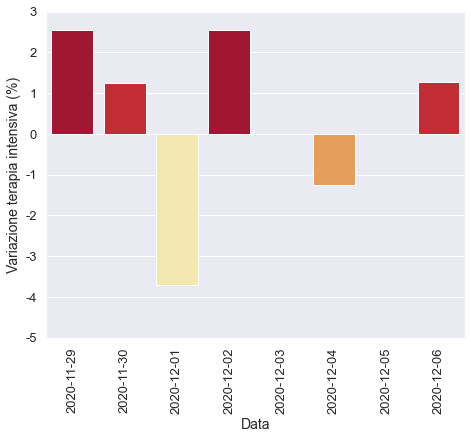

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

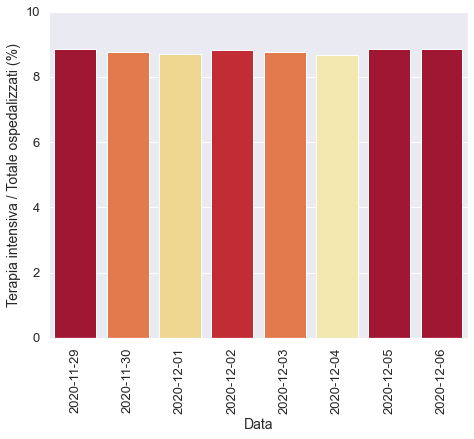

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

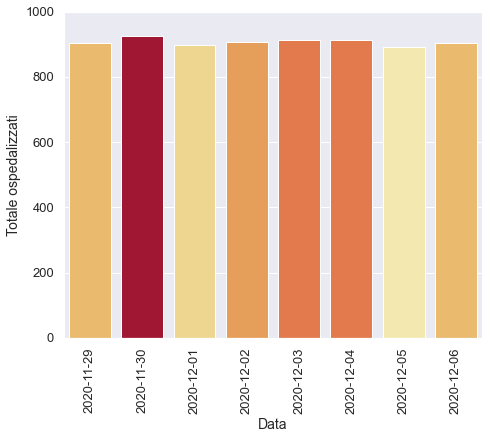

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

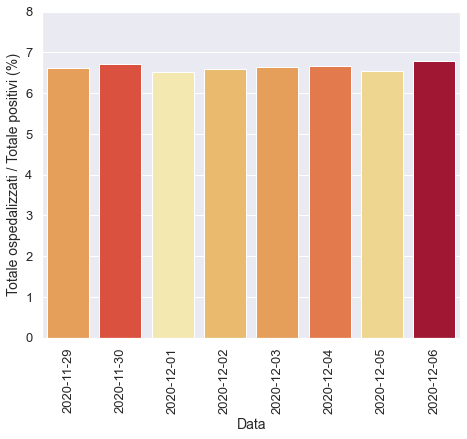

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

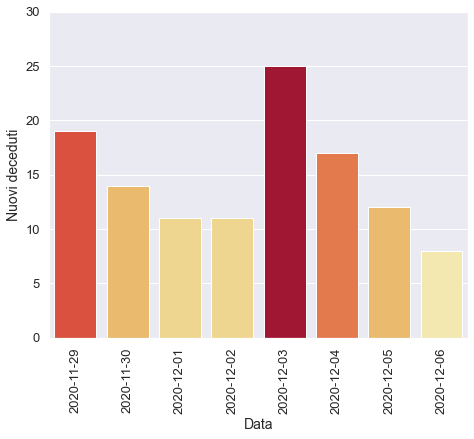

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

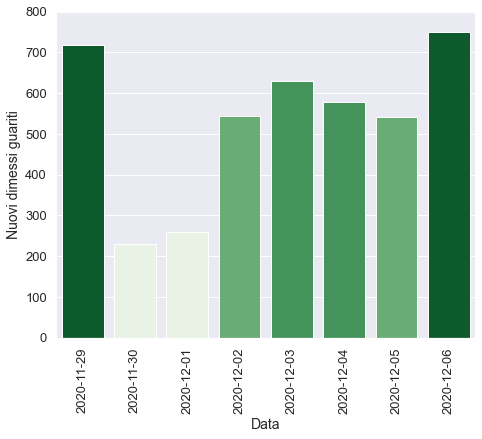

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)